<center>
    <u><font size="36">Regression Tree</font></u>
    <h2>by Rebecca Hinrichs</h2>
    <h4>SPRING 2023</h4>
</center>

<b>Purpose:</b> The goal of this assignment is to build a regression tree and use some or all of the explanatory variables to predict the median house value.

<b>Data:</b> We were provided with the file `cali_housing.csv`. The data provides information on the following variables.<br>
- <u>MedInc</u>: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
- <u>HouseAge</u>: House age; a lower number is a newer building
- <u>AveRooms</u>: Average number of rooms in houses within a block
- <u>AveBedrms</u>: Average number of bedrooms in houses within a block
- <u>Population</u>: Total number of people residing within a block
- <u>AveOccup</u>: Average occupancy in houses within a block
- <u>Latitude</u>: A measure of how far north a house is; a higher value is farther north
- <u>Longitude</u>: A measure of how far west a house is; a higher value is farther west
- <u>MedHouseVal</u>: Median house value for households within a block (measured in hundreds of thousands of US Dollars)

<b>Approach:</b> We will build & train a Decision Tree Regression model using `scikit-learn`'s built-in methods. Using cross-validation methods to tune our hyperparameters, we will save and report the accuracies of the best model. 

--- -

> 1. Import the data set into pandas data frame and inspect it.

In [1]:
# Import Libraries & Dependencies
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import tree
from sklearn import metrics

# Import Dataset
df = pd.read_csv("cali_housing.csv")
display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


> 2. Select one or more explanatory variables you would like to use by looking at the scatter 
plot how each of those explanatory variables affects the target variable.

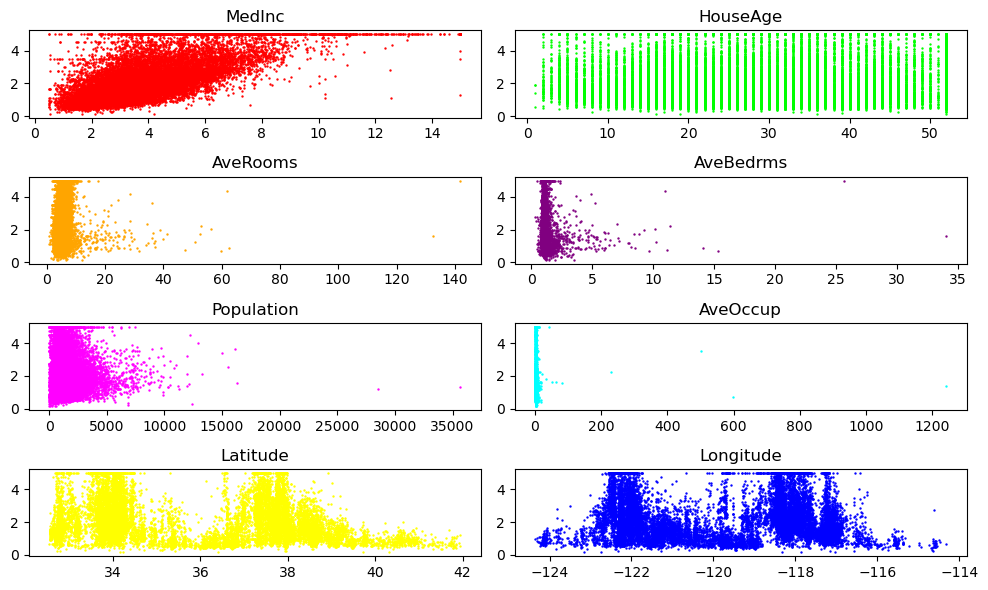

In [2]:
# Plot each explanatory variable against the target variable
fig, axs = plt.subplots(4,2, figsize=(10,6))
axs[0,0].scatter(x=df['MedInc'], y=df['MedHouseVal'], s=.5, c='red')
axs[0,0].set_title("MedInc")
axs[0,1].scatter(x=df['HouseAge'], y=df['MedHouseVal'], s=.5, c='lime')
axs[0,1].set_title("HouseAge")
axs[1,0].scatter(x=df['AveRooms'], y=df['MedHouseVal'], s=.5, c='orange')
axs[1,0].set_title("AveRooms")
axs[1,1].scatter(x=df['AveBedrms'], y=df['MedHouseVal'], s=.5, c='purple')
axs[1,1].set_title("AveBedrms")
axs[2,0].scatter(x=df['Population'], y=df['MedHouseVal'], s=.5, c='magenta')
axs[2,0].set_title("Population")
axs[2,1].scatter(x=df['AveOccup'], y=df['MedHouseVal'], s=.5, c='aqua')
axs[2,1].set_title("AveOccup")
axs[3,0].scatter(x=df['Latitude'], y=df['MedHouseVal'], s=.5, c='yellow')
axs[3,0].set_title("Latitude")
axs[3,1].scatter(x=df['Longitude'], y=df['MedHouseVal'], s=.5, c='blue')
axs[3,1].set_title("Longitude")
fig.tight_layout()

<br>It appears that `MedInc` may hold the most promise of correlation.<br><br>

> 3.  Split the data into training and testing sets

In [3]:
# Define the feature and target variables for training, testing
y = df['MedHouseVal']
X = df.drop(['MedHouseVal'], axis=1)

# Split the data into training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, random_state=42)

# Report the dataset shapes
print(f'Dataframe shape :: {df.shape}')
print(f'\t`X_train` :: {X_train.shape}\t`y_train` :: {y_train.shape}')
print(f'\t `X_test` ::  {X_test.shape}\t`y_test`  ::  {y_test.shape}')
print(f'\t- - - - - - - - - - - - - - - - - - - - - - -')
print(f'\t  All `X` :: ({X_train.shape[0]+X_test.shape[0]}, ' \
      f'{int((X_train.shape[1]+X_test.shape[1])/2)})\t' \
      f'  all `y` :: ({y_train.shape[0]+y_test.shape[0]},)')

Dataframe shape :: (20640, 9)
	`X_train` :: (14448, 8)	`y_train` :: (14448,)
	 `X_test` ::  (6192, 8)	`y_test`  ::  (6192,)
	- - - - - - - - - - - - - - - - - - - - - - -
	  All `X` :: (20640, 8)	  all `y` :: (20640,)


> 4.  Figure out if there are any missing values in the explanatory variables you want to use.
If there are any missing values, you can either delete those data instances from the data
set or fill in the missing values. If a numerical variable has missing values, you might
fill those in with the average or median of that variable. If a categorical variable has
missing values, you might fill those in using the most common value

In [4]:
# Check for blanks
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
# Check for zeroes
(df==0).sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [6]:
# Snapshot proof
X_train.sample(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
6122,2.9459,32,4.656934,1.051095,2161,3.943431,34.12,-117.92
1906,4.3333,15,11.024561,2.168421,725,2.543860,38.76,-120.02
1155,3.0446,26,5.657534,1.113014,790,2.705479,39.50,-121.44
17506,2.7411,52,4.636771,1.071749,531,2.381166,37.35,-121.90
10076,3.0043,24,16.793296,3.427374,780,2.178771,39.32,-120.26
15599,1.4648,28,6.330709,1.610236,567,2.232283,32.64,-116.20
10707,2.6848,26,4.594268,1.095023,888,1.339367,33.61,-117.71
8954,3.5909,38,4.263066,1.108014,1312,2.285714,34.02,-118.39
6031,3.2481,34,5.528226,0.989919,1761,3.550403,34.08,-117.72
13169,4.0050,7,4.966767,1.021148,1143,3.453172,36.84,-121.44


In [7]:
# # Otherwise, we would impute
# from sklearn.impute import SimpleImputer
# columns = [i for i in X.columns]
# imputer = SimpleImputer(missing_values=0,strategy='mean').fit(X_train)
# X_train[columns] = imputer.transform(X_train[columns])
# print(f'X_train :: {X_train.sample(5)}')
# X_test[columns] = imputer.transform(X_test[columns])
# print(f'X_test :: {X_test.sample(5)}')

> 5.  Build a regression tree using the training data.

In [7]:
# Fit a regression model to the training data
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [8]:
# Describe the tree
print(f'\nThe tree has {regressor.get_depth()} depth & {regressor.get_n_leaves()} leaves\n')
# plt.figure(figsize=(15,10))  ## it's way too big for this!
# tree.plot_tree(regressor,
#                filled=True, 
#                rounded=True,
#                fontsize=14);


The tree has 34 depth & 13831 leaves



> 6.  Inspect the evaluation measures such as MAE, MSE, or RMSE.

In [9]:
# Calculate Errors from model predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
def report_errors(modelname, X_data, y_data):
    print(f'Mean Absolute Error (MAE) :: {np.round(mean_absolute_error(y_data, modelname.predict(X_data)), 4)}\n' \
          f'Mean Squared Error (MSE) :: {np.round(mean_squared_error(y_data, modelname.predict(X_data)), 4)}\n' \
          f'Root Mean Squared Error (RMSE) :: {np.round(mean_squared_error(y_data, modelname.predict(X_data), squared=False), 4)}\n')
print(f'\nOn the Training Data ::')
report_errors(regressor, X_train, y_train)
print(f'On the Testing Data ::')
report_errors(regressor, X_test, y_test)


On the Training Data ::
Mean Absolute Error (MAE) :: 0.0
Mean Squared Error (MSE) :: 0.0
Root Mean Squared Error (RMSE) :: 0.0

On the Testing Data ::
Mean Absolute Error (MAE) :: 0.4707
Mean Squared Error (MSE) :: 0.5277
Root Mean Squared Error (RMSE) :: 0.7264



> 7.  Modify the tree hyper-parameters (such as `criterion`, `max_depth`, `min_samples_split`, and `min_samples_leaf`) of your model to increase the quality of the prediction. You
might plot graphs showing error for different values of these parameters


The tree has 5 depth & 31 leaves

Errors on the Training Data....
Mean Absolute Error (MAE) :: 0.5172
Mean Squared Error (MSE) :: 0.4968
Root Mean Squared Error (RMSE) :: 0.7048

Errors on the Testing Data....
Mean Absolute Error (MAE) :: 0.5297
Mean Squared Error (MSE) :: 0.5233
Root Mean Squared Error (RMSE) :: 0.7234



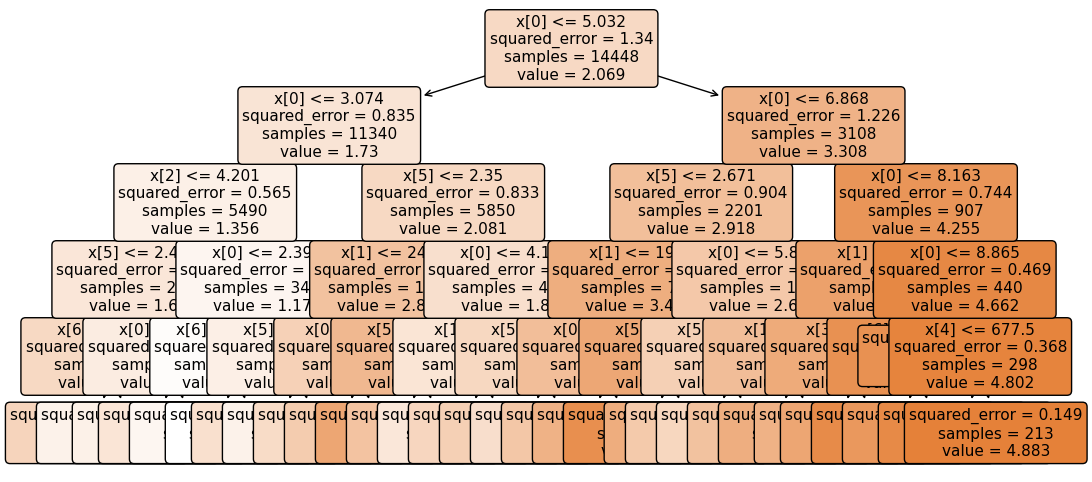

In [10]:
# Instantiate a new regression model fitted to the training data & tuning the hyperparameters
tuned_reg = tree.DecisionTreeRegressor(criterion = 'squared_error',
                                       max_depth = 5,
                                       min_samples_split = 150,
                                       min_samples_leaf = 85).fit(X_train, y_train)
print(f'\nThe tree has {tuned_reg.get_depth()} depth & {tuned_reg.get_n_leaves()} leaves\n')
print(f'Errors on the Training Data....')
report_errors(tuned_reg, X_train, y_train)
print(f'Errors on the Testing Data....')
report_errors(tuned_reg, X_test, y_test)
plt.figure(figsize=(12,6))
tree.plot_tree(tuned_reg,
               filled=True, 
               rounded=True,
               fontsize=11);

> 8. Use `GridSearchCV()`, `RandomizedSearchCV()`,  or pruning to find the best model.

In [ ]:
# # Find optimal parameters using GridSearchCV  ## <<--- this took waaaayyyyy too long!
# from sklearn.model_selection import GridSearchCV
# gs = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), 
#                  param_grid={'max_depth': range(1, 34),
#                              'min_samples_split': range(2, 250, 1),
#                              'min_samples_leaf': range(2, 250, 1),
#                              'criterion': ['gini', 'entropy']},
#                  cv=5,
#                  scoring="recall").fit(X_train, y_train)
# print(f'Best parameters ::\n{gs.best_params_}')
# print(f'Model accuracy ::\n{gs.best_score_}')
# print(f'True accuracy ::\n{gs.score(X_test, y_test)}')

# # Demonstrate the regression tree
# plt.figure(figsize=(12,6))
# tree.plot_tree(gs.best_estimator_,
#                filled=True, 
#                rounded=True,
#                fontsize=11);

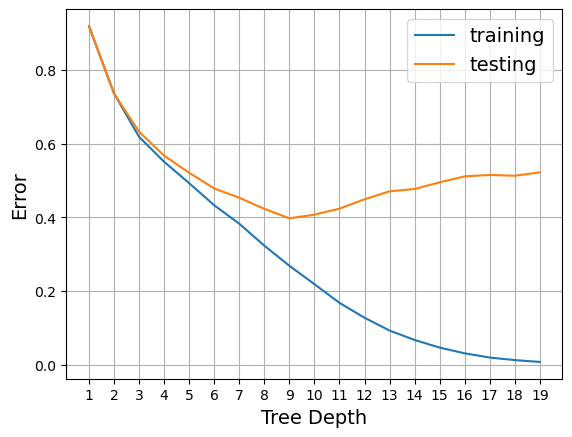

In [11]:
# Find optimal tree depth using Pruning Method
max_depth = []
error_train = []
error_test = []

for i in range(1, 20):
    tree_model = tree.DecisionTreeRegressor(max_depth=i)
    tree_model.fit(X_train, y_train)
    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)
    error_train.append(mean_squared_error(y_train, y_pred_train))
    error_test.append(mean_squared_error(y_test, y_pred_test))
    
    max_depth.append(i)

d = pd.DataFrame({'max_depth' : max_depth,
                  'error_train': error_train,
                  'error_test': error_test})

threshold = .07
optimal_depth_index = np.argmax(np.abs(d.error_train-d.error_test) > threshold)
optimal_depth = d.max_depth[optimal_depth_index]

plt.plot(d.max_depth, d.error_train, label='training')
plt.plot(d.max_depth, d.error_test, label='testing')
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.xticks(max_depth)
plt.grid()
plt.legend(fontsize=14);

In [12]:
optimal_depth

7

In [13]:
# Find optimal tree complexity using Pruning Method
pruning_model = tree.DecisionTreeRegressor(max_depth=optimal_depth, random_state=42)
path = pruning_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path['ccp_alphas']
mse_vals = list()
for ccp_alpha in ccp_alphas:
    pruning_model.set_params(ccp_alpha = ccp_alpha)
    pruning_model.fit(X_train, y_train)
    mse_vals.append(mean_squared_error(y_test, pruning_model.predict(X_test)))
optimal_alpha = ccp_alphas[np.argmin(mse_vals)]
optimal_alpha

0.0005307470897576454

In [14]:
# Find optimal sampling parameters using RandomizedSearchCV with Pruning Measures
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
rs = RandomizedSearchCV(estimator=tree.DecisionTreeRegressor(max_depth = optimal_depth,
                                                             ccp_alpha = optimal_alpha,
                                                             random_state=42),
                        param_distributions={'max_features': ['sqrt', 'log2'],
                                            'min_samples_split': range(2, 250, 1),
                                            'min_samples_leaf': range(2, 250, 1),
                                            'min_impurity_decrease': np.arange(.01, 1.0, .01),
                                            'criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse']},
                        n_iter=500,
                        cv=5)
rs.fit(X_train, y_train)
print(f'\nBest parameters ::\n{rs.best_params_}')
print(f'\nCross-validation score ::\n{rs.best_score_}\n')


Best parameters ::
{'min_samples_split': 181, 'min_samples_leaf': 14, 'min_impurity_decrease': 0.01, 'max_features': 'log2', 'criterion': 'friedman_mse'}

Cross-validation score ::
0.6364633418458497



In [15]:
# Describe the best model & score on the Test Data
best_model = rs.best_estimator_
best_model.score(X_test,y_test)

0.6292502539271443

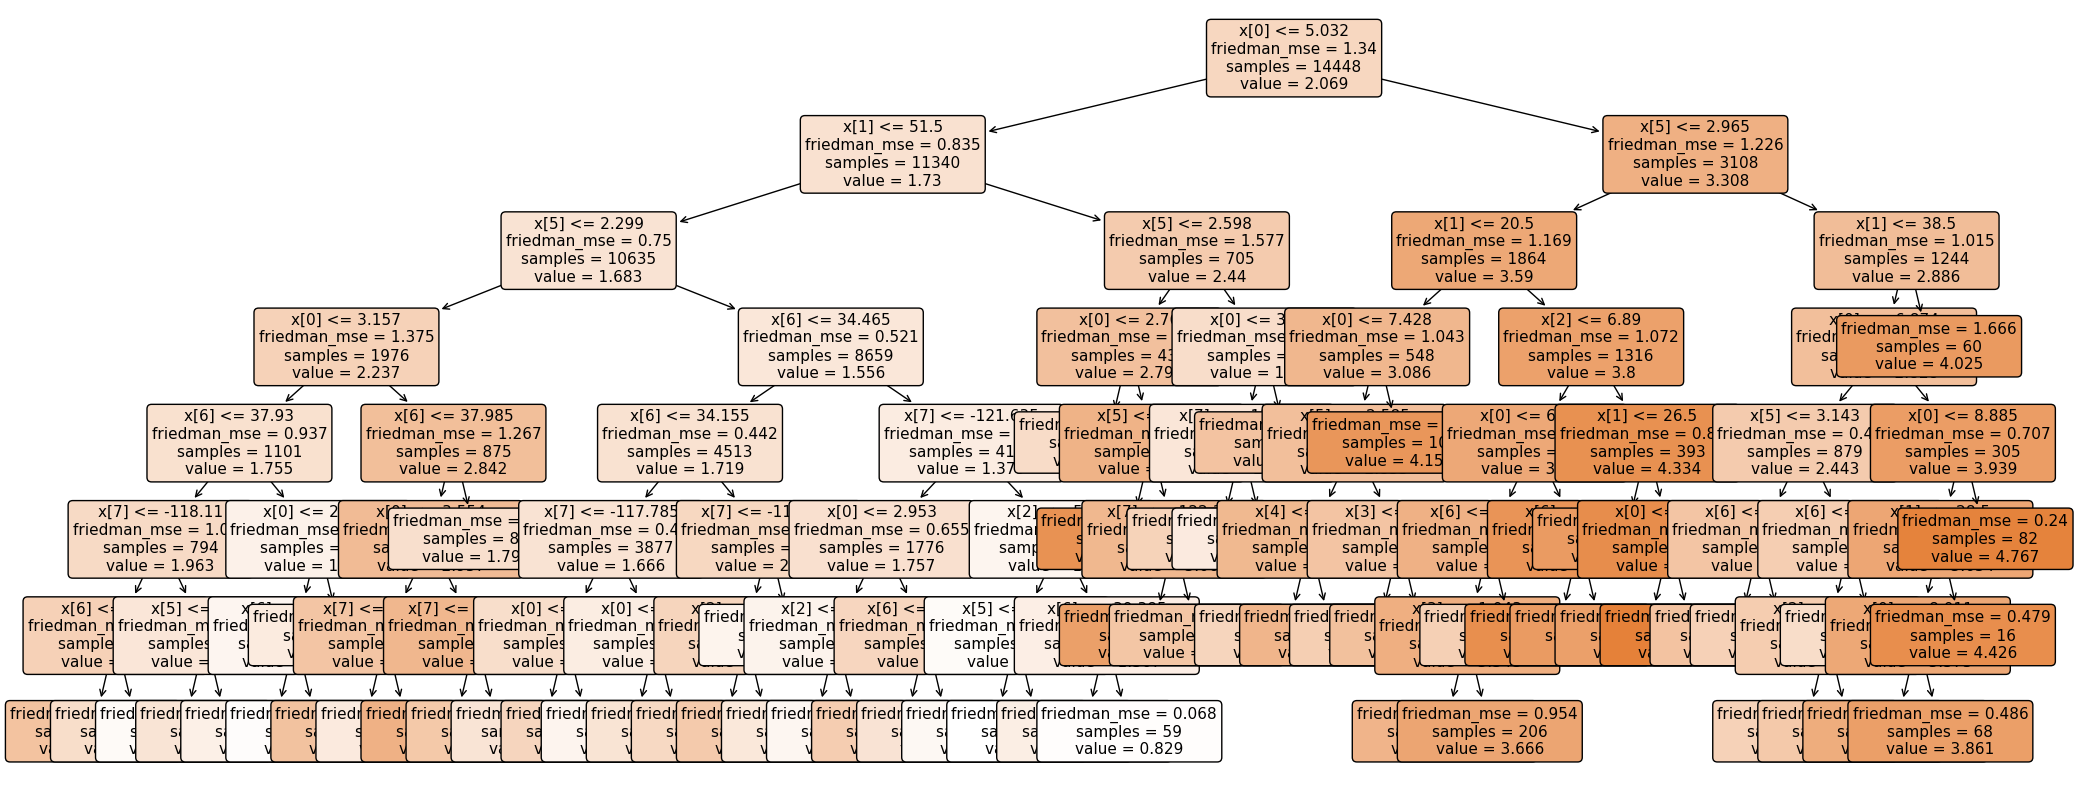

In [16]:
# Demonstrate the tree
plt.figure(figsize=(25,10))
tree.plot_tree(best_model,
               filled = True,
               rounded = True,
               fontsize = 11);

> 9. Compute the MAE, MSE, or RMSE for your model.

In [23]:
# Calculate Error from model predictions
print(f'\nThe Best Model prediction errors on the Test Data....\n')
report_errors(best_model, X_test, y_test)


The Best Model prediction errors on the Test Data....

Mean Absolute Error (MAE) :: 0.5036
Mean Squared Error (MSE) :: 0.4866
Root Mean Squared Error (RMSE) :: 0.6976



> 10. Determine which features are the most important in your model.

In [24]:
# Identify strength of feature importances
importance = best_model.feature_importances_
importance

array([0.66403058, 0.05355296, 0.02452407, 0.0032605 , 0.00160095,
       0.10724201, 0.06901946, 0.07676947])

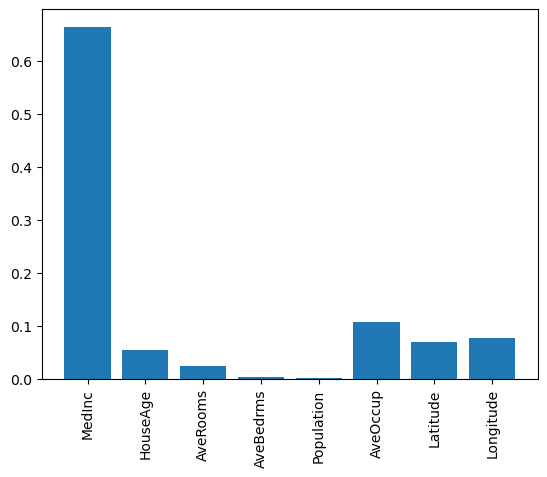

In [25]:
# Demonstrate density of feature importances
position = range(len(importance))
plt.bar(position, importance)
features = [i for i in X.columns]
plt.xticks(position, features, rotation=90);

> 11.  Take some values for the explanatory variables and use your model to predict the median house value.e

In [48]:
# Let the user enter some test feature values
user_X = list()
for index, variable in enumerate(features):
    min_var, max_var = np.min(X[variable]), np.max(X[variable])
    if index==0:
        print(f'\nEnter a value ranged {min_var} to {max_var} for {variable}, or `0` for None: ')
        user_x = float(input('')) * importance[[index]][0]
    else:
        print(f'Enter a value ranged {min_var} to {max_var} for {variable}, or `0` for None: ')
        user_x = int(input('')) * importance[[index]][0]
    user_X.append(user_x)
user_X = [user_X]

# Run a sample test predictions based on user-inputted features
import warnings
warnings.filterwarnings("ignore")  # suppress 'valid feature names' warning
prediction = best_model.predict(user_X)[0] * 100000
print(f'\nThe Median House Value predicted with those parameters is $ {np.round(prediction, 2)} US dollars\n')


Enter a value ranged 0.4999 to 15.0001 for MedInc, or `0` for None: 


 85


Enter a value ranged 1 to 52 for HouseAge, or `0` for None: 


 12


Enter a value ranged 0.846153846 to 141.9090909 for AveRooms, or `0` for None: 


 7


Enter a value ranged 0.333333333 to 34.06666667 for AveBedrms, or `0` for None: 


 3


Enter a value ranged 3 to 35682 for Population, or `0` for None: 


 24500


Enter a value ranged 0.692307692 to 1243.333333 for AveOccup, or `0` for None: 


 5


Enter a value ranged 32.54 to 41.95 for Latitude, or `0` for None: 


 37


Enter a value ranged -124.35 to -114.31 for Longitude, or `0` for None: 


 -120



The Median House Value predicted with those parameters is $ 415354.64 US dollars

